In [164]:
import numpy as np             
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras.applications.resnet import ResNet50
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.applications.vgg16 import VGG16

In [ ]:
train_path = r"C:\\Users\Computing\Downloads\data-task1\data-task1\train"
test_path =r"C:\\Users\Computing\Downloads\data-task1\data-task1\test"
valid_path = r"C:\\Users\Computing\Downloads\data-task1\data-task1\val"

In [72]:
batch_size = 32

img_height = 224
img_width = 224

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True
                               )

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [74]:
 train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary',
      batch_size=batch_size
      )

test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      shuffle=False, 
      class_mode='binary',
      batch_size=batch_size
      )

valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 3000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


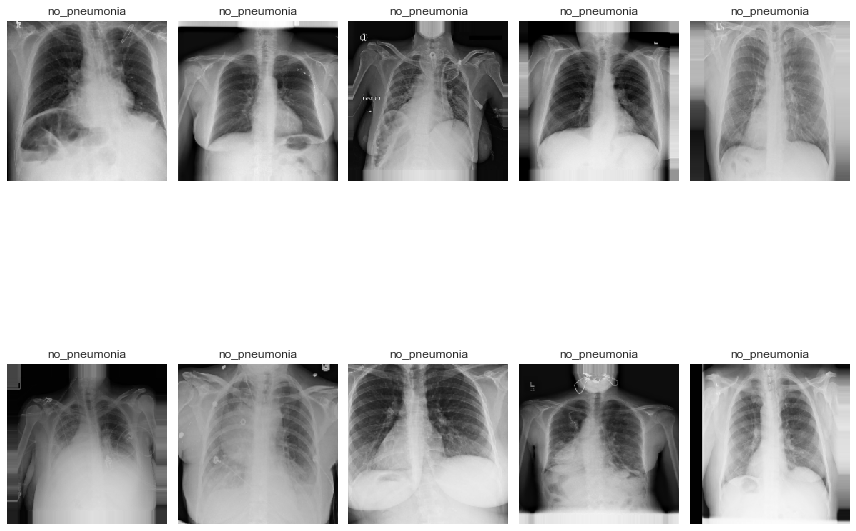

In [76]:
plt.figure(figsize=(12, 12))

for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'no_pneumonia', 1:'pneumonia'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
        
plt.tight_layout()
plt.show()

In [78]:
CNN_Model=Sequential()

#Image Feature Extraction:(Block: 1 - Block: 3)
#Block-1
CNN_Model.add(layers.Conv2D(16, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Block-2
CNN_Model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))
CNN_Model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Block-3
CNN_Model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))
CNN_Model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
CNN_Model.add(layers.MaxPooling2D(pool_size = (2, 2)))

#Final Layer(Classification/prediction)
CNN_Model.add(layers.Flatten())
CNN_Model.add(layers.Dense(activation = 'relu', units = 128))
CNN_Model.add(layers.Dense(activation = 'relu', units = 64))
CNN_Model.add(layers.Dense(activation = 'sigmoid', units = 1))
CNN_Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [79]:
CNN_Model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 32)      

In [80]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [82]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(
                               'balanced', 
                               classes=np.unique(train.classes), 
                               y=train.classes
                               )
cw = dict(zip(np.unique(train.classes), weights))
print(cw)



CNN_Model.fit(train, epochs=50, validation_data=valid, class_weight=cw, callbacks=callbacks_list)




{0: 0.6361323155216285, 1: 2.336448598130841}
Epoch 1/50
94/94 [==============================] - 64s 684ms/step - loss: 0.5386 - accuracy: 0.7307 - val_loss: 0.5550 - val_accuracy: 0.7180 - lr: 3.0000e-04
Epoch 2/50
94/94 [==============================] - 65s 687ms/step - loss: 0.5340 - accuracy: 0.7440 - val_loss: 0.5500 - val_accuracy: 0.7280 - lr: 3.0000e-04
Epoch 3/50
94/94 [==============================] - 64s 681ms/step - loss: 0.5405 - accuracy: 0.7237 - val_loss: 0.6206 - val_accuracy: 0.6740 - lr: 3.0000e-04
Epoch 4/50
94/94 [==============================] - 64s 684ms/step - loss: 0.5333 - accuracy: 0.7293 - val_loss: 0.5373 - val_accuracy: 0.7380 - lr: 3.0000e-04
Epoch 5/50
94/94 [==============================] - 64s 679ms/step - loss: 0.5373 - accuracy: 0.7310 - val_loss: 0.5115 - val_accuracy: 0.7520 - lr: 3.0000e-04
Epoch 6/50
94/94 [==============================] - 64s 680ms/step - loss: 0.5332 - accuracy: 0.7320 - val_loss: 0.6357 - val_accuracy: 0.6860 - lr: 3.000

<AxesSubplot:>

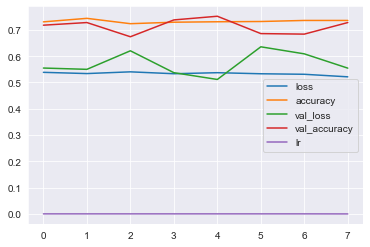

In [83]:
pd.DataFrame(CNN_Model.history.history).plot()

In [84]:
test_accu_CNN = CNN_Model.evaluate(test)
print('The testing accuracy is :',test_accu_CNN[1]*100, '%')

16/16 [==============================] - 6s 343ms/step - loss: 0.5513 - accuracy: 0.7180
The testing accuracy is : 71.79999947547913 %


In [85]:
preds = CNN_Model.predict(test,verbose=1)

16/16 [==============================] - 6s 342ms/step


In [86]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

<AxesSubplot:>

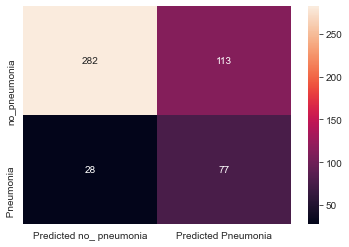

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["no_pneumonia", " Pneumonia"],
columns=["Predicted no_ pneumonia", "Predicted Pneumonia"])
sns.heatmap(cm,annot=True,fmt="d")

In [91]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.91      0.71      0.80       395
   PNEUMONIA       0.41      0.73      0.52       105

    accuracy                           0.72       500
   macro avg       0.66      0.72      0.66       500
weighted avg       0.80      0.72      0.74       500



(500, 224, 224, 3)
(500,)


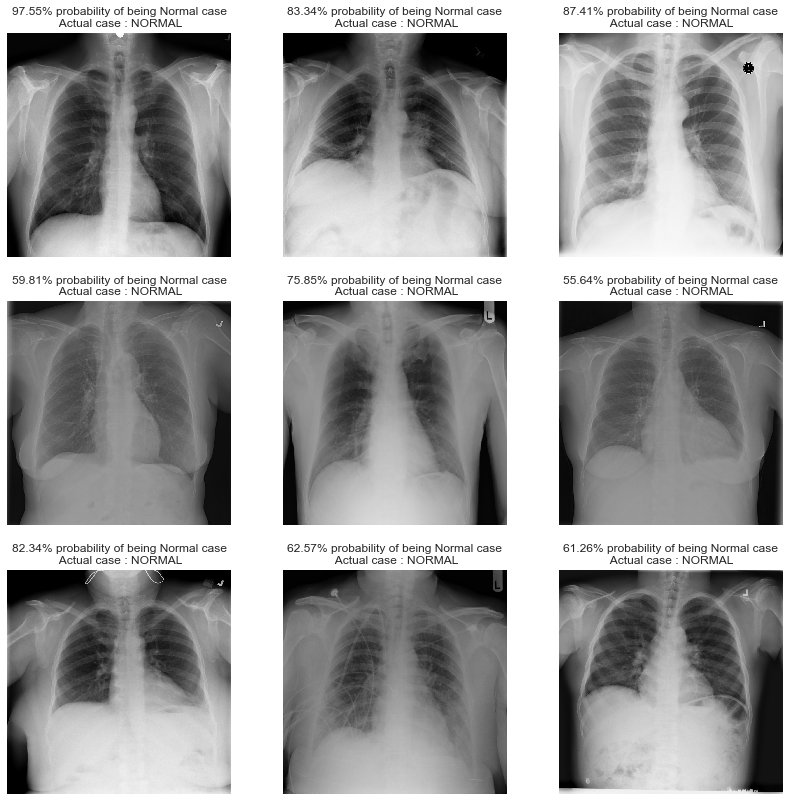

In [93]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(14, 14))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
      
      
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

In [126]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

Found 3000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [127]:
from tensorflow.keras.applications.resnet50 import ResNet50
Resnet_model = ResNet50(weights='imagenet', include_top=False)
    
                                    

In [128]:
result = Resnet_model.output
result = GlobalAveragePooling2D()(result)
# add a fully-connected layer
result = Dense(512, activation='relu')(result)
# and a fully connected output/classification layer
predictions = Dense(2, activation='sigmoid')(result)

In [129]:
inception_transfer =Model(inputs=Resnet_model.input, outputs=predictions)

In [130]:
inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [132]:
import tensorflow as tf
with tf.device("/device:GPU:0"):
    history_pretrained = inception_transfer.fit_generator(
    train_generator,
    epochs=15, shuffle = True, verbose = 1, validation_data = test_generator)

<ipython-input-132-b607d3519ffa>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_pretrained = inception_transfer.fit_generator(


Epoch 1/15
188/188 [==============================] - 397s 2s/step - loss: 0.4428 - accuracy: 0.7900 - val_loss: 2.4268 - val_accuracy: 0.2100
Epoch 2/15
188/188 [==============================] - 397s 2s/step - loss: 0.4184 - accuracy: 0.8040 - val_loss: 2.6740 - val_accuracy: 0.2100
Epoch 3/15
188/188 [==============================] - 399s 2s/step - loss: 0.4016 - accuracy: 0.8097 - val_loss: 0.9115 - val_accuracy: 0.4260
Epoch 4/15
188/188 [==============================] - 399s 2s/step - loss: 0.3899 - accuracy: 0.8227 - val_loss: 0.5490 - val_accuracy: 0.7320
Epoch 5/15
188/188 [==============================] - 399s 2s/step - loss: 0.3820 - accuracy: 0.8270 - val_loss: 0.5266 - val_accuracy: 0.7200
Epoch 6/15
188/188 [==============================] - 400s 2s/step - loss: 0.3702 - accuracy: 0.8247 - val_loss: 0.4653 - val_accuracy: 0.7740
Epoch 7/15
188/188 [==============================] - 400s 2s/step - loss: 0.3666 - accuracy: 0.8357 - val_loss: 0.3992 - val_accuracy: 0.7960

<AxesSubplot:>

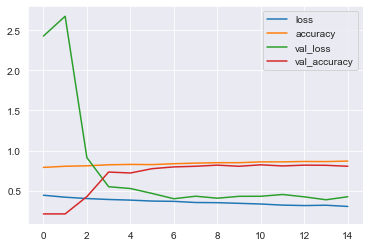

In [135]:
pd.DataFrame( inception_transfer.history.history).plot()

In [152]:
scores = inception_transfer.evaluate(test_generator)
print('acc =',scores[1]*100)

32/32 [==============================] - 15s 466ms/step - loss: 0.4241 - accuracy: 0.8040
acc = 80.40000200271606


In [139]:
preds =  inception_transfer.predict(test,verbose=1)

16/16 [==============================] - 15s 912ms/step


16/16 [==============================] - 15s 898ms/step
Confusion Matrix
[[336  54]
 [ 47  63]]
Classification Report
              precision    recall  f1-score   support

      NORMAL       0.88      0.86      0.87       390
   PNEUMONIA       0.54      0.57      0.56       110

    accuracy                           0.80       500
   macro avg       0.71      0.72      0.71       500
weighted avg       0.80      0.80      0.80       500



[Text(0, 0.5, 'Pneumonia'), Text(0, 1.5, 'no_pneumonia')]

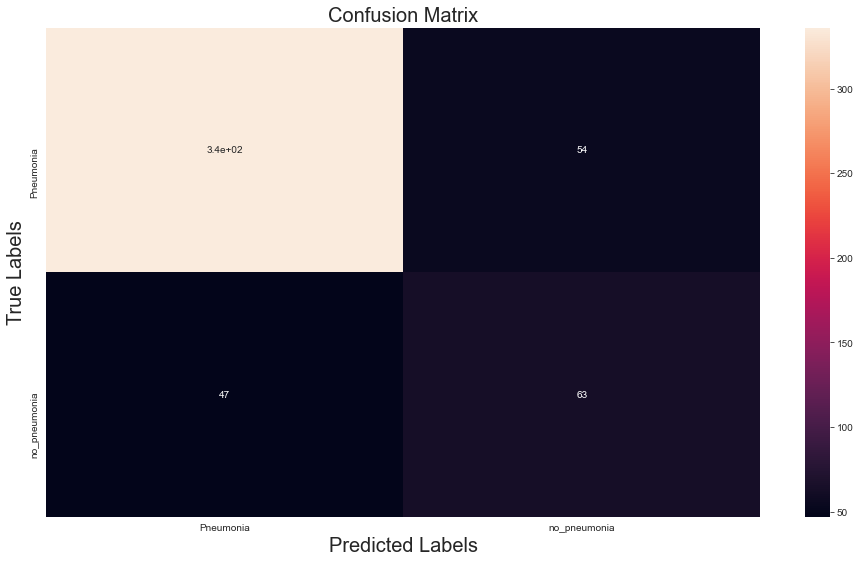

In [163]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
batch_size=64
Y_pred = inception_transfer.predict(test,verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['NORMAL','PNEUMONIA']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

matrix = confusion_matrix(validation_generator.classes, y_pred)
labels=(( 'Pneumonia'),('no_pneumonia'))
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

(500, 224, 224, 3)
(500,)


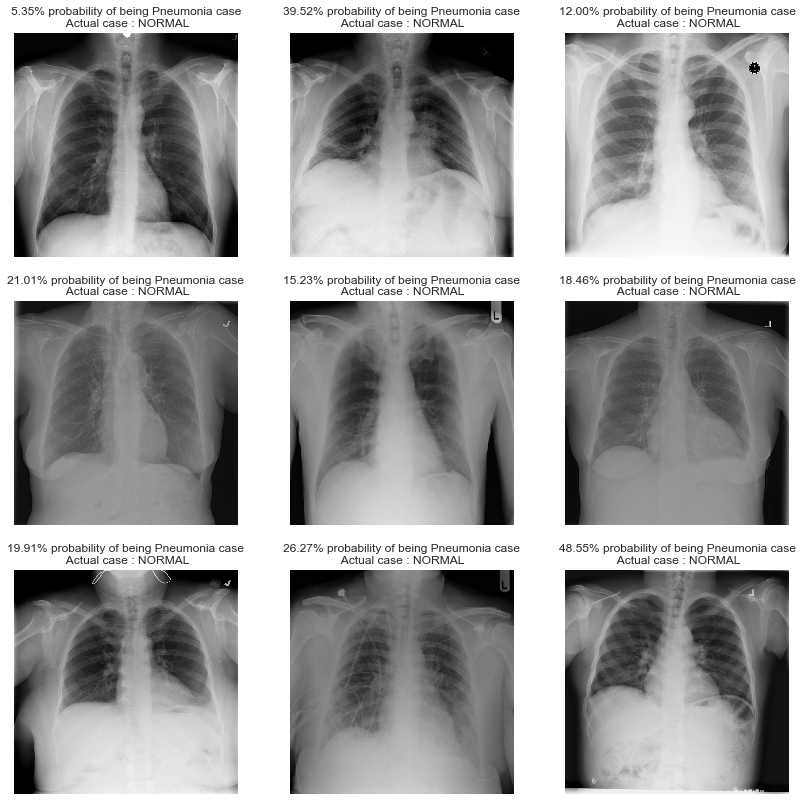

In [172]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(14, 14))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][1]))    
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][1]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

In [169]:
#for vgg model
vgg16_model= VGG16(weights='imagenet', include_top=False)
result =vgg16_model.output
result = GlobalAveragePooling2D()(result)
# add a fully-connected layer
result = Dense(512, activation='relu')(result)
# and a fully connected output/classification layer
predictions = Dense(2, activation='sigmoid')(result)
inception_transfer = Model(inputs=vgg16_model.input, outputs=predictions)
inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
import tensorflow as tf
with tf.device("/device:GPU:0"):
    history_pretrained = inception_transfer.fit_generator(
    train_generator,
    epochs=15, shuffle = True, verbose = 1, validation_data = test_generator)


<ipython-input-169-e431d3876e53>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_pretrained = inception_transfer.fit_generator(


Epoch 1/15
188/188 [==============================] - 704s 4s/step - loss: 0.4976 - accuracy: 0.7860 - val_loss: 0.4689 - val_accuracy: 0.7900
Epoch 2/15
188/188 [==============================] - 685s 4s/step - loss: 0.4483 - accuracy: 0.7860 - val_loss: 0.4452 - val_accuracy: 0.7940
Epoch 3/15
188/188 [==============================] - 685s 4s/step - loss: 0.4207 - accuracy: 0.8057 - val_loss: 0.4516 - val_accuracy: 0.7900
Epoch 4/15
188/188 [==============================] - 687s 4s/step - loss: 0.4094 - accuracy: 0.8113 - val_loss: 0.4291 - val_accuracy: 0.8000
Epoch 5/15
188/188 [==============================] - 699s 4s/step - loss: 0.4052 - accuracy: 0.8137 - val_loss: 0.4249 - val_accuracy: 0.7980
Epoch 6/15
188/188 [==============================] - 700s 4s/step - loss: 0.4020 - accuracy: 0.8110 - val_loss: 0.4164 - val_accuracy: 0.8160
Epoch 7/15
188/188 [==============================] - 699s 4s/step - loss: 0.3950 - accuracy: 0.8220 - val_loss: 0.4083 - val_accuracy: 0.8200

<AxesSubplot:>

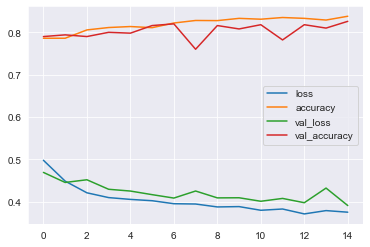

In [173]:
pd.DataFrame( inception_transfer.history.history).plot()

In [174]:
scores = inception_transfer.evaluate(test_generator)
print('acc =',scores[1]*100)

32/32 [==============================] - 26s 794ms/step - loss: 0.3906 - accuracy: 0.8260
acc = 82.59999752044678


16/16 [==============================] - 26s 2s/step
Confusion Matrix
[[360  30]
 [ 58  52]]
Classification Report
              precision    recall  f1-score   support

      NORMAL       0.86      0.92      0.89       390
   PNEUMONIA       0.63      0.47      0.54       110

    accuracy                           0.82       500
   macro avg       0.75      0.70      0.72       500
weighted avg       0.81      0.82      0.81       500



[Text(0, 0.5, 'Pneumonia'), Text(0, 1.5, 'no_pneumonia')]

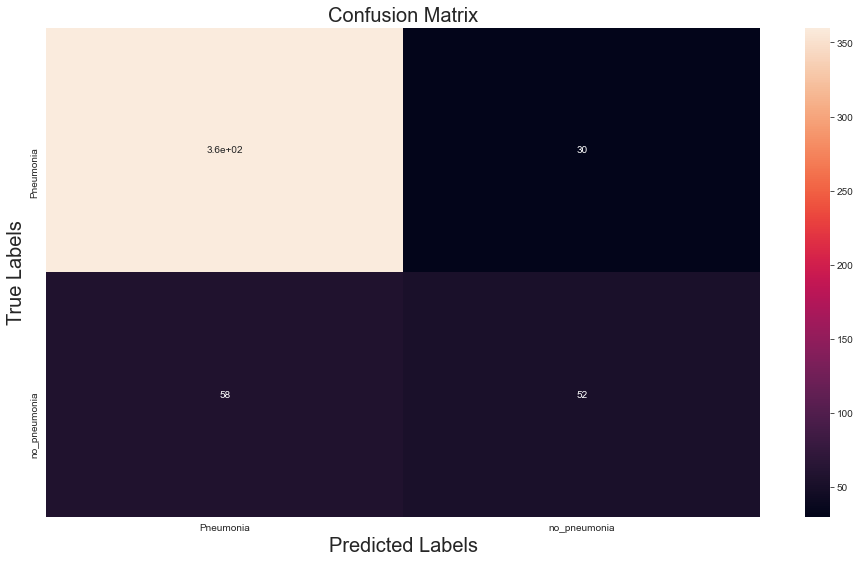

In [175]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
batch_size=64
Y_pred = inception_transfer.predict(test,verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['NORMAL','PNEUMONIA']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

matrix = confusion_matrix(validation_generator.classes, y_pred)
labels=(( 'Pneumonia'),('no_pneumonia'))
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

(500, 224, 224, 3)
(500,)


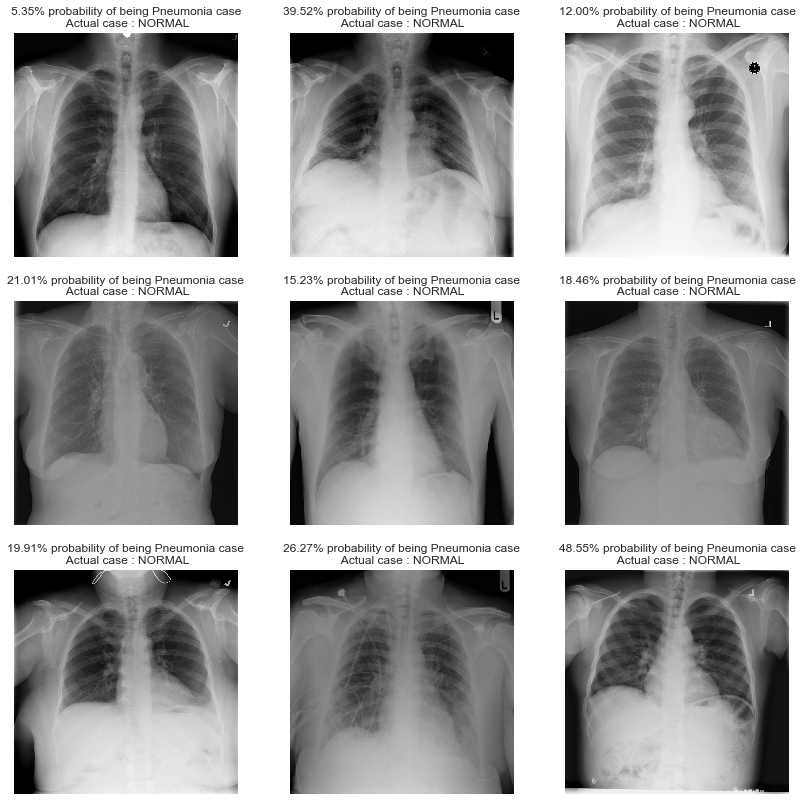

In [176]:
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(14, 14))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5: 
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][1]))    
  else: 
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][1]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()